# KELOMPOK MIRACLE7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [2]:
df = pd.read_csv("ecommerce.csv")

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## 1. Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [5]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [12]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
nums = ['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

In [13]:
df[nums].describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [14]:
df[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


## 2. Univariate Analysis

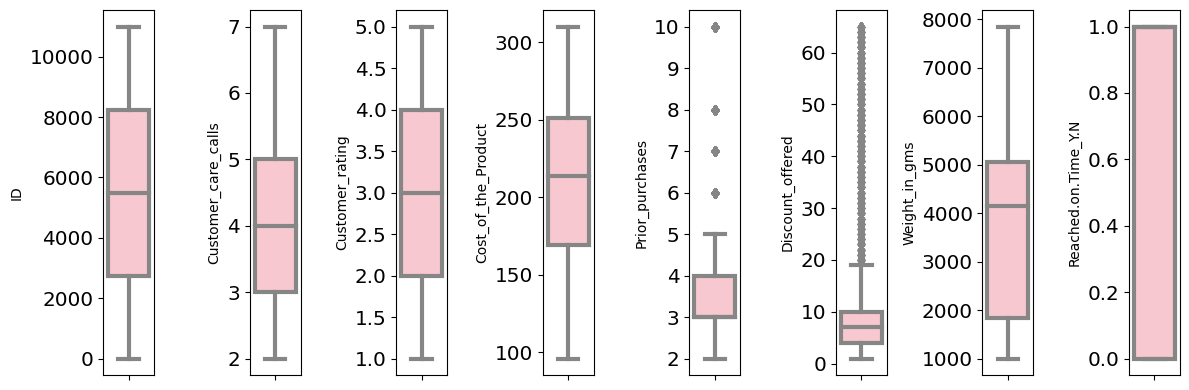

In [24]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='pink', orient='v')
    plt.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

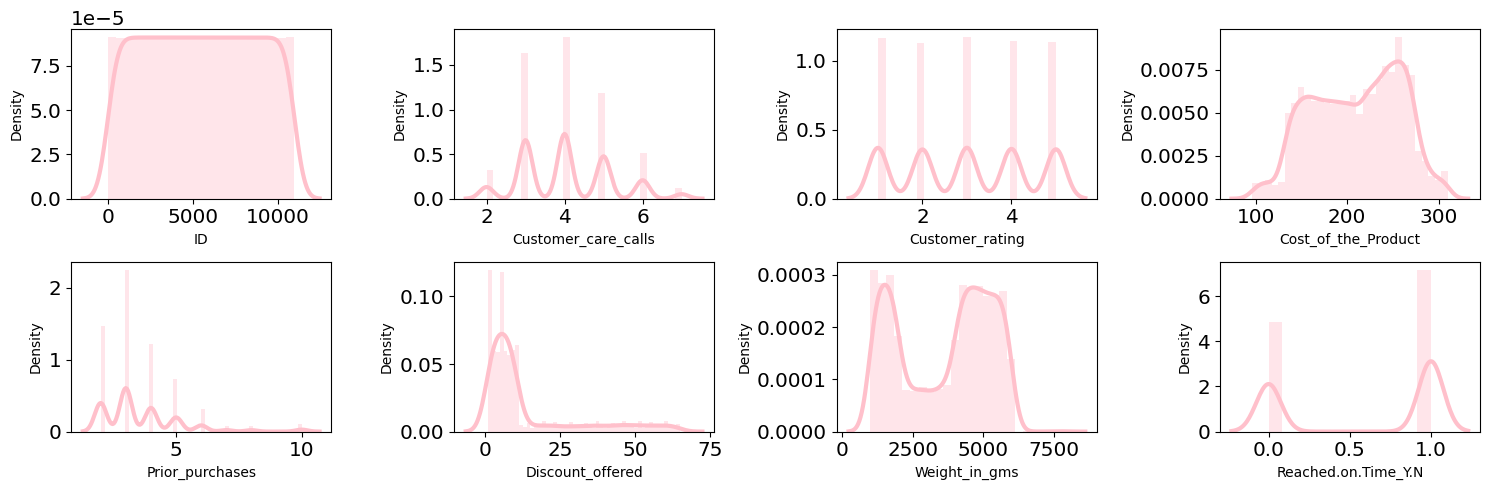

In [25]:
plt.figure(figsize=(15, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.distplot(df[nums[i]], color='pink')
    plt.tight_layout()

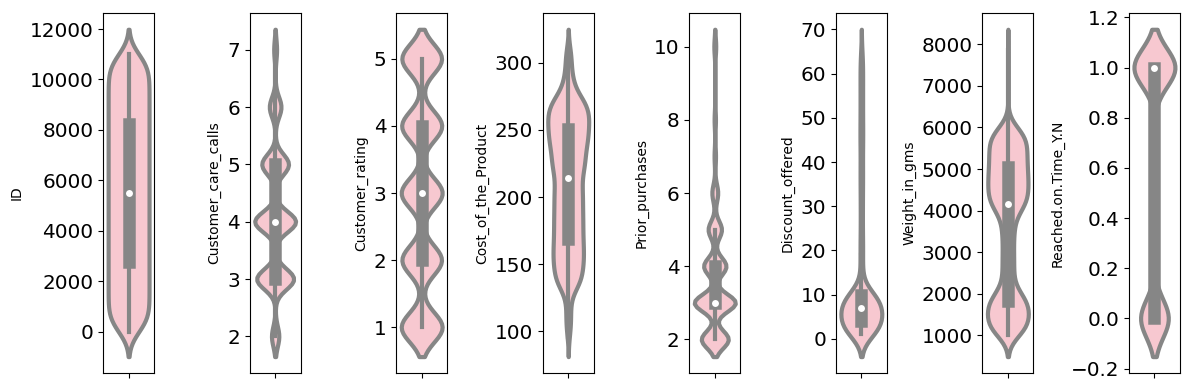

In [26]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='pink', orient='v')
    plt.tight_layout()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\

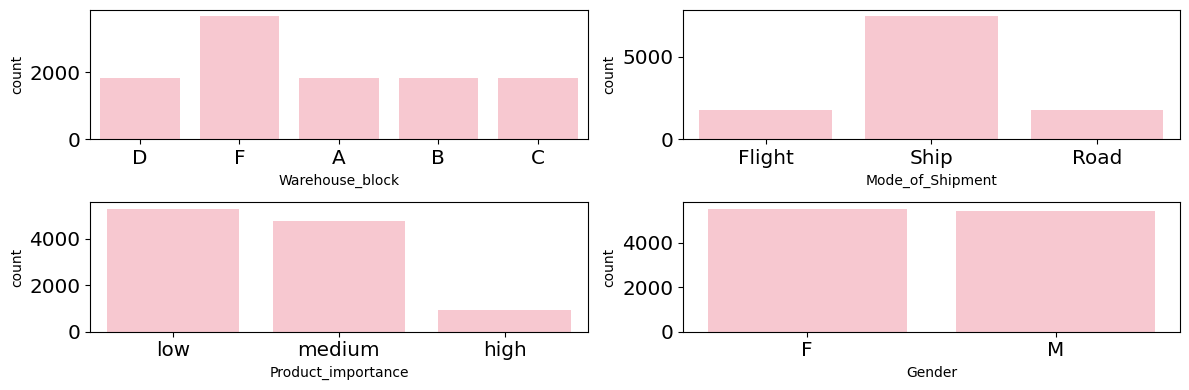

In [27]:
for i in range(0, len(cats)):
    plt.subplot(2, 2, i+1)
    sns.countplot(df[cats[i]], color='pink', orient='h')
    plt.tight_layout()

## 3. Multivariate Analysis

<AxesSubplot:>

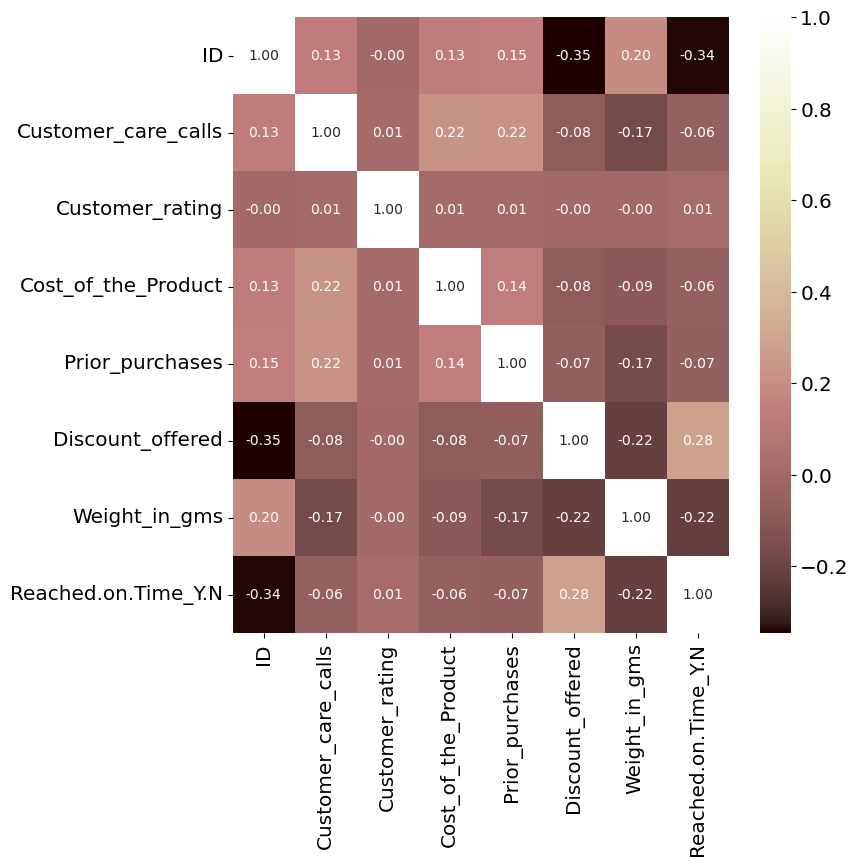

In [4]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(method='kendall'), cmap='pink', annot=True, fmt='.2f')

### Chi Square Test

#### Hypothesis
H0 : There is a relationship between Predictor Variable and Target Variable

H1 : There is no relationship between Predictor Variable and Target Variable

In [43]:
def chi2(df, col1, col2):    
    #---create the contingency table---
    df_crosstab= pd.crosstab(index = df[col1], columns = df[col2])
    
    #---calculate degree of freedom---
    degree_f = (df_crosstab.shape[0]-1) * (df_crosstab.shape[1]-1)
    
    #---sum up the totals for row and columns---
    df_crosstab.loc[:,'Total']= df_crosstab.sum(axis=1)
    df_crosstab.loc['Total']= df_crosstab.sum()
    
    #---create the expected value dataframe---
    df_exp = df_crosstab.copy()    
    df_exp.iloc[:,:] = np.multiply.outer(
        df_crosstab.sum(1).values,df_crosstab.sum().values) / df_crosstab.sum().sum()            
    
    # calculate chi-square values
    df_chi2 = ((df_crosstab - df_exp)**2) / df_exp    
    df_chi2.loc[:,'Total']= df_chi2.sum(axis=1)
    df_chi2.loc['Total']= df_chi2.sum()
    
    #---get chi-square score---   
    chi_square_score = df_chi2.iloc[:-1,:-1].sum().sum()
    
    #---calculate the p-value---
    from scipy import stats
    from scipy.stats import chi2
    alpha=0.05
    p = stats.distributions.chi2.sf(chi_square_score, degree_f)
    critical_value=chi2.ppf(q=1-alpha,df=degree_f)
    
    print ('chi_square:',chi_square_score)
    print ('critical_value:',critical_value)
    print ('Df:', degree_f)
    print ('p-value:',p)
    print ('alpha:',alpha)
    print ('')
    print ('**Kesimpulan**')
    if p<=alpha:
        print('Reject H0, There is a relationship between variable', col1, 'and Reached On Time (Target Variable)')
    else:
        print('Retain H0, There is no relationship between variable', col1, 'and Reached On Time (Target Variable)') 
    return

##### Warehouse_block 

In [44]:
chi2(df, 'Warehouse_block', 'Reached.on.Time_Y.N')

chi_square: 1.0893868307263044
critical_value: 9.487729036781154
Df: 4
p-value: 0.8959524278243698
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Warehouse_block and Reached On Time (Target Variable)


##### Mode_of_Shipment

In [45]:
chi2(df, 'Mode_of_Shipment', 'Reached.on.Time_Y.N')

chi_square: 0.7434357246718557
critical_value: 5.991464547107979
Df: 2
p-value: 0.6895487627593786
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Mode_of_Shipment and Reached On Time (Target Variable)


##### Customer_care_calls

In [46]:
chi2(df, 'Customer_care_calls', 'Reached.on.Time_Y.N')

chi_square: 54.27373399881682
critical_value: 11.070497693516351
Df: 5
p-value: 1.8411500205174103e-10
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Customer_care_calls and Reached On Time (Target Variable)


##### Customer_rating 

In [47]:
chi2(df, 'Customer_rating', 'Reached.on.Time_Y.N')

chi_square: 3.200045474831146
critical_value: 9.487729036781154
Df: 4
p-value: 0.5249236018493662
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Customer_rating and Reached On Time (Target Variable)


##### Cost_of_the_Product 

In [48]:
chi2(df, 'Cost_of_the_Product', 'Reached.on.Time_Y.N')

chi_square: 268.6543139449169
critical_value: 249.12753599764454
Df: 214
p-value: 0.006624116139158186
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Cost_of_the_Product and Reached On Time (Target Variable)


##### Prior_purchases 

In [49]:
chi2(df, 'Prior_purchases', 'Reached.on.Time_Y.N')

chi_square: 125.9220708194259
critical_value: 14.067140449340169
Df: 7
p-value: 4.4645971837938025e-24
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Prior_purchases and Reached On Time (Target Variable)


##### Product_importance 

In [50]:
chi2(df, 'Product_importance', 'Reached.on.Time_Y.N')

chi_square: 12.211163824831026
critical_value: 5.991464547107979
Df: 2
p-value: 0.0022303831047450844
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Product_importance and Reached On Time (Target Variable)


##### Gender

In [51]:
chi2(df, 'Gender', 'Reached.on.Time_Y.N')

chi_square: 0.2418189825019984
critical_value: 3.841458820694124
Df: 1
p-value: 0.6228954255886712
alpha: 0.05

**Kesimpulan**
Retain H0, There is no relationship between variable Gender and Reached On Time (Target Variable)


##### Discount_offered 

In [52]:
chi2(df, 'Discount_offered', 'Reached.on.Time_Y.N')

chi_square: 2361.925922384745
critical_value: 83.67526074272097
Df: 64
p-value: 0.0
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Discount_offered and Reached On Time (Target Variable)


##### Weight_in_gms

In [53]:
chi2(df, 'Weight_in_gms', 'Reached.on.Time_Y.N')

chi_square: 4828.546306813456
critical_value: 4181.85406486543
Df: 4033
p-value: 3.655331282966219e-17
alpha: 0.05

**Kesimpulan**
Reject H0, There is a relationship between variable Weight_in_gms and Reached On Time (Target Variable)


#### Conclusion
Predictor variables that have a relationship with the target variable are Customer_care_calls, Cost_of_the_Product, Prior_purchases, Product_importance, Discount_offered, Weight_in_gms. Other variables have no relationship so it needs to be discarded.

## t-test

In [69]:
rp.ttest(df['Customer_care_calls'], df['Reached.on.Time_Y.N'], paired=True)

C:\Users\HP\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
C:\Users\HP\anaconda3\lib\site-packages\researchpy\ttest.py:140: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(              Variable        N      Mean        SD        SE  95% Conf.  \
 0  Customer_care_calls  10999.0  4.054459  1.141490  0.010884   4.033125   
 1  Reached.on.Time_Y.N  10999.0  0.596691  0.490584  0.004678   0.587521   
 2                 diff  10999.0  3.457769  1.272341  0.012132   3.433988   
 
    Interval  
 0  4.075794  
 1  0.605860  
 2  3.481549  ,
                                Paired samples t-test     results
 0  Difference (Customer_care_calls - Reached.on.T...      3.4578
 1                              Degrees of freedom =   10998.0000
 2                                               t =     285.0158
 3                           Two side test p value =       0.0000
 4                          Difference < 0 p value =       0.0000
 5                          Difference > 0 p value =       1.0000
 6                                       Cohen's d =       4.2373
 7                                       Hedge's g =       4.2371
 8                                 

In [70]:
rp.ttest(df['Weight_in_gms'], df['Reached.on.Time_Y.N'], paired=True)

C:\Users\HP\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
C:\Users\HP\anaconda3\lib\site-packages\researchpy\ttest.py:140: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(              Variable        N         Mean           SD         SE  \
 0        Weight_in_gms  10999.0  3634.016729  1635.377251  15.593419   
 1  Reached.on.Time_Y.N  10999.0     0.596691     0.490584   0.004678   
 2                 diff  10999.0  3633.420038  1635.509185  15.594677   
 
      95% Conf.     Interval  
 0  3603.450825  3664.582632  
 1     0.587521     0.605860  
 2  3602.851669  3663.988408  ,
                                Paired samples t-test     results
 0  Difference (Weight_in_gms - Reached.on.Time_Y....   3633.4200
 1                              Degrees of freedom =   10998.0000
 2                                               t =     232.9910
 3                           Two side test p value =       0.0000
 4                          Difference < 0 p value =       0.0000
 5                          Difference > 0 p value =       1.0000
 6                                       Cohen's d =       4.4422
 7                                       Hedge's g = 

In [71]:
rp.ttest(df['Discount_offered'], df['Reached.on.Time_Y.N'], paired=True)

C:\Users\HP\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
C:\Users\HP\anaconda3\lib\site-packages\researchpy\ttest.py:140: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(              Variable        N       Mean         SD        SE  95% Conf.  \
 0     Discount_offered  10999.0  13.373216  16.205527  0.154521  13.070327   
 1  Reached.on.Time_Y.N  10999.0   0.596691   0.490584  0.004678   0.587521   
 2                 diff  10999.0  12.776525  16.017041  0.152723  12.477160   
 
     Interval  
 0  13.676104  
 1   0.605860  
 2  13.075891  ,
                                Paired samples t-test     results
 0  Difference (Discount_offered - Reached.on.Time...     12.7765
 1                              Degrees of freedom =   10998.0000
 2                                               t =      83.6579
 3                           Two side test p value =       0.0000
 4                          Difference < 0 p value =       0.0000
 5                          Difference > 0 p value =       1.0000
 6                                       Cohen's d =       1.5305
 7                                       Hedge's g =       1.5304
 8                     

## 4. Business Insight

In [72]:
# Split dataset by reached on time

df_c_y = df[df['Reached.on.Time_Y.N'] == 0]
df_c_n = df[df['Reached.on.Time_Y.N'] == 1]

m = df_c_y.groupby('Customer_rating').agg({'ID' : 'nunique'}).reset_index()
m.columns = ['Customer Rating', 'Total Unique Customer']

n = df_c_n.groupby('Customer_rating').agg({'ID' : 'nunique'}).reset_index()
n.columns = ['Customer Rating', 'Total Unique Customer']

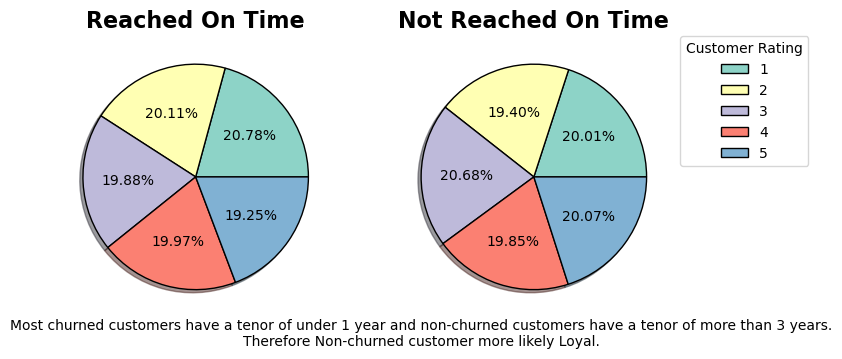

In [73]:
# create pie plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (8,10))

ax1.pie(m['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)

ax1.set_title('Reached On Time',
              ha = 'center', fontsize = 16, fontweight='bold')

ax2.pie(n['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)

ax2.set_title('Not Reached On Time', 
              ha = 'center', fontsize = 16, fontweight='bold')

ax2.text(x = -1, y = -1.5, s = 'Most churned customers have a tenor of under 1 year and non-churned customers have a tenor of more than 3 years.\nTherefore Non-churned customer more likely Loyal.', 
         ha = 'center', fontsize = 10)

ax2.legend(labels = m['Customer Rating'], title = 'Customer Rating', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

In [ ]:
# create pie plot

fig, (ax1) = plt.subplots(1, 2, figsize = (8,10))

ax1.pie(m['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)

ax1.set_title('Reached On Time',
              ha = 'center', fontsize = 16, fontweight='bold')

ax2.pie(n['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)

ax2.set_title('Not Reached On Time', 
              ha = 'center', fontsize = 16, fontweight='bold')

ax2.text(x = -1, y = -1.5, s = 'Most churned customers have a tenor of under 1 year and non-churned customers have a tenor of more than 3 years.\nTherefore Non-churned customer more likely Loyal.', 
         ha = 'center', fontsize = 10)

ax2.legend(labels = m['Customer Rating'], title = 'Customer Rating', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()

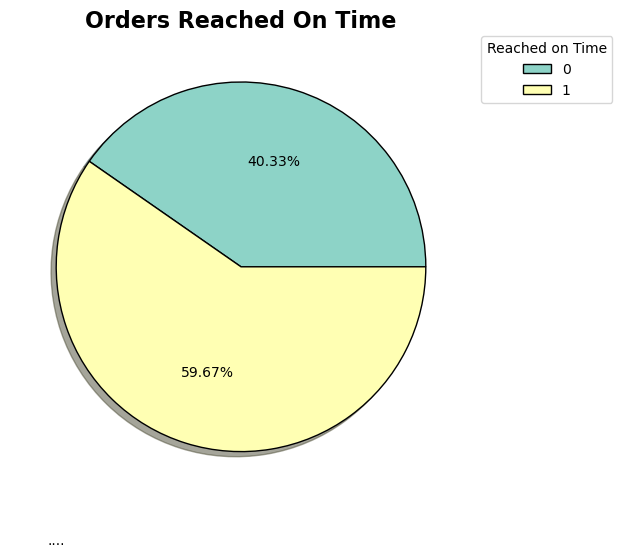

In [34]:
m = df.groupby('Reached.on.Time_Y.N').agg({'ID' : 'nunique'}).reset_index()
m.columns = ['Reached on Time', 'Total Unique Customer']
fig = plt.figure(figsize=(6,6))
ax = plt.axes()
ax.pie(m['Total Unique Customer'], colors = sns.color_palette('Set3'), 
        wedgeprops = {'edgecolor':'k'}, autopct = '%.2f%%', shadow = True, startangle = 0)
ax.set_title('Orders Reached On Time', ha = 'center', fontsize = 16, fontweight='bold')

ax.text(x = -1, y = -1.5, s = '....', 
         ha = 'center', fontsize = 10)
ax.legend(labels = m['Reached on Time'], title = 'Reached on Time', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

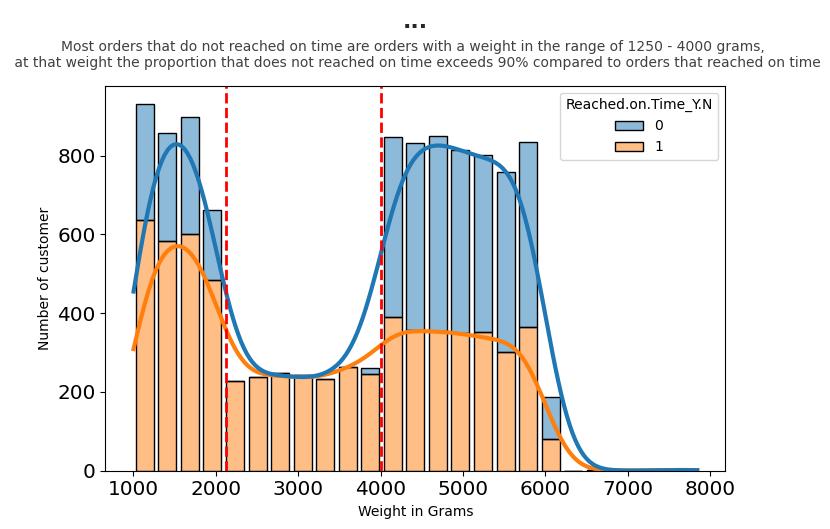

In [18]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (8,5))

sns.histplot(x = 'Weight_in_gms', data = df, hue = 'Reached.on.Time_Y.N', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Weight in Grams')
ax.axvline(2125, color = 'r', linestyle = '--', lw = 2)
ax.text(2125*1.1, 500, s='', weight = 'bold', alpha = 0.85)

ax.axvline(4000, color = 'r', linestyle = '--', lw = 2)
ax.text(4000*1.1, 500, s = '', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, '...', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "Most orders that do not reached on time are orders with a weight in the range of 1250 - 4000 grams, \n at that weight the proportion that does not reached on time exceeds 90% compared to orders that reached on time", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()

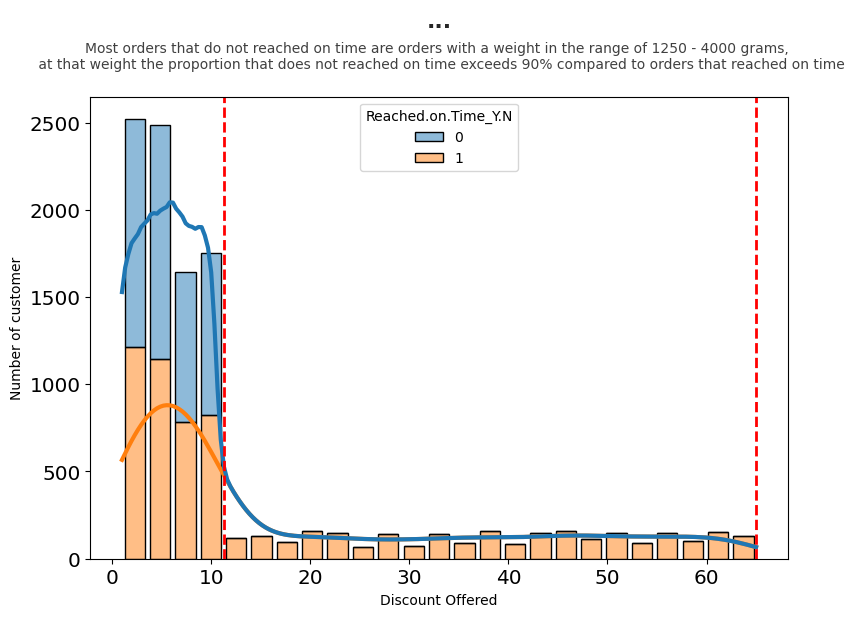

In [28]:
# Create histplot
fig, ax = plt.subplots(1, 1, figsize = (9,6))

sns.histplot(x = 'Discount_offered', data = df, hue = 'Reached.on.Time_Y.N', 
             kde = True, multiple = 'stack', 
             bins = 25, shrink = 0.8, 
             ax = ax)

ax.set_ylabel('Number of customer')
ax.set_xlabel('Discount Offered')
ax.axvline(11.25, color = 'r', linestyle = '--', lw = 2)
ax.text(11.25*1.1, 500, s='', weight = 'bold', alpha = 0.85)

ax.axvline(65, color = 'r', linestyle = '--', lw = 2)
ax.text(65*1.1, 500, s = '', weight = 'bold', alpha = 0.85)

Xstart, Xend = ax.get_xlim()
Ystart, Yend = ax.get_ylim()

ax.text((Xstart+Xend)/2, Yend*1.15, '...', 
        ha = 'center', fontsize = 16, fontweight='bold', alpha = 0.85)

ax.text((Xstart+Xend)/2, Yend*1.12, "Most orders that do not reached on time are orders with a weight in the range of 1250 - 4000 grams, \n at that weight the proportion that does not reached on time exceeds 90% compared to orders that reached on time", 
        ha = 'center', va ='top', fontsize = 10, alpha = 0.75)

plt.show()

## 5. Git